In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import clear_output
import chess
from chess import svg
from IPython.core.display import display
import time

In [57]:
def evaluate(board, chess_board, player):
    if chess_board.is_checkmate():
        if player:
            return 1000
        else:
            return -1000
    else:
        if chess_board.is_game_over():
            return 0
    white_score = 0
    black_score = 0
    white_positions, opponent_positions, black_fields_under_attack, black_fields_under_defense = check_check(board.copy(), 0)
    black_positions, op_positions, white_fields_under_attack, white_fields_under_defense = check_check(board.copy(), 1)
    for i in range(8):
        for j in range(8):
            # MATERIAL
            # PAWN
            if board[i][j] == 11:
                if i in [3, 4] and j in [3, 4]:
                    black_score += 50
                if j in [1]:
                    black_score += 50
                black_score += 100
            if board[i][j] == 12:
                if i < 1 or i > 6 or j < 1 or j > 6:
                    black_score -= 30
                black_score += 300
            if board[i][j] == 14:
                black_score += 350
            if board[i][j] == 15:
                black_score += 500
            if board[i][j] == 18:
                black_score += 900
            if board[i][j] == 1:
                white_score += 100
                if i in [3, 4] and j in [3, 4]:
                    white_score += 50
                if j in [1]:
                    white_score += 50
            if board[i][j] == 2:
                if i < 1 or i > 6 or j < 1 or j > 6:
                    white_score -= 30
                white_score += 300
            if board[i][j] == 4:
                white_score += 350
            if board[i][j] == 5:
                white_score += 500
            if board[i][j] == 8:
                white_score += 900
            # MATERIAL ENDS
            # center points
            if i in [3, 4] and j in [3, 4]:
                if board[i][j] > 9:
                    black_score += 30
                else:
                    if board[i][j] > 0:
                        white_score += 30
            # FREE LAST HORIZONTAL
            if j == 0:
                if board[i][j] in [2, 4]:
                    white_score -= 30
            if j == 7:
                if board[i][j] in [12, 14]:
                    black_score -= 30
    # Attack fields and defense
    for a, b, c in white_positions:
        score = white_fields_under_attack.count((a, b)) - white_fields_under_defense.count((a, b))
        if score > 0:
            white_score -= c / 3
        white_score += len(white_fields_under_defense) * 3
        white_score += 3 * len(black_fields_under_attack)
    for a, b, c in black_positions:
        score = black_fields_under_attack.count((a, b)) - black_fields_under_defense.count((a, b))
        if score > 0:
            black_score -= c / 3
        black_score += len(black_fields_under_defense) * 3
        black_score += 3 * len(white_fields_under_attack)
    return (white_score - black_score) / white_score

In [3]:
def check_check(board, Player):
    fields_under_attack = []
    fields_under_defense = []
    opponent = 10 * (1 - Player)
    your = 10 * Player
    opponent_all = [opponent + k for k in [1, 2, 4, 5, 8, 9]]
    your_all = [your + k for k in [1, 2, 4, 5, 8, 9]]
    diap = [k for k in range(8)]
    opponent_positions = []
    your_positions = []
    for i in range(8):
        for j in range(8):
            b = int(board[i][j] > 9)
            if board[i][j] in opponent_all:
                opponent_positions.append((i, j, board[i][j] - 10 * b))
            if board[i][j] in your_all:
                your_positions.append((i, j, board[i][j] - 10 * b))
            if board[i][j] == your + 1:
                if i + 1 < 8 and j + 1 - 2 * Player in diap and board[i + 1][j + 1 - 2 * Player] in opponent_all:
                    fields_under_attack.append((i + 1, j + 1 - 2 * Player))
                if i + 1 < 8 and j - 1 - 2 * Player in diap and board[i - 1][j + 1 - 2 * Player] in opponent_all:
                    fields_under_attack.append((i - 1, j + 1 - 2 * Player))
                if i + 1 < 8 and j + 1 - 2 * Player in diap and board[i + 1][j + 1 - 2 * Player] in your_all:
                    fields_under_defense.append((i + 1, j + 1 - 2 * Player))
                if i + 1 < 8 and j - 1 - 2 * Player in diap and board[i - 1][j + 1 - 2 * Player] in your_all:
                    fields_under_defense.append((i - 1, j + 1 - 2 * Player))
            if board[i][j] == your + 2:
                for k, m in [(-1, 2), (1, 2), (1, -2), (-1, -2), (-2, -1), (-2, 1), (2, -1), (2, 1)]:
                    if i + k in diap and j + m in diap:
                        if board[i + k][j + m] in opponent_all:
                            fields_under_attack.append((i + k, j + m))
                        if board[i + k][j + m] in your_all:
                            fields_under_defense.append((i + k, j + m))
            if board[i][j] in [your + 4, your + 8]:
                k = 1
                while i + k in diap and j + k in diap and board[i][j] == 0:
                    k += 1
                if i + k in diap and j + k in diap:
                    if board[i + k][j + k] in opponent_all:
                        fields_under_attack.append((i + k, j + k))
                    if board[i + k][j + k] in your_all:
                        fields_under_defense.append((i + k, j + k))
                k = 1
                while i - k in diap and j + k in diap and board[i][j] == 0:
                    k += 1
                if i - k in diap and j + k in diap:
                    if board[i - k][j + k] in opponent_all:
                        fields_under_attack.append((i - k, j + k))
                    if board[i - k][j + k] in your_all:
                        fields_under_defense.append((i - k, j + k))
                        
                k = 1
                while i + k in diap and j - k in diap and board[i][j] == 0:
                    k += 1
                if i + k in diap and j - k in diap:
                    if board[i + k][j - k] in opponent_all:
                        fields_under_attack.append((i + k, j - k))
                    if board[i + k][j - k] in your_all:
                        fields_under_defense.append((i + k, j - k))
                        
                k = 1        
                while i - k in diap and j - k in diap and board[i][j] == 0:
                    k += 1
                if i - k in diap and j - k in diap:
                    if board[i - k][j - k] in opponent_all:
                        fields_under_attack.append((i - k, j - k))
                    if board[i - k][j - k] in your_all:
                        fields_under_defense.append((i - k, j - k))
                        
            if board[i][j] in [your + 5, your + 8]:
                k = 1
                while i + k < 8 and board[i + k][j] == 0:
                    k += 1
                if i + k < 8 and board[i + k][j] in opponent_all:
                    fields_under_attack.append((i + k, j))
                if i + k < 8 and board[i + k][j] in your_all:
                    fields_under_defense.append((i + k, j))
                    
                k = 1
                while j + k < 8 and board[i][j + k] == 0:
                    k += 1
                if j + k < 8 and board[i][j + k] in opponent_all:
                    fields_under_attack.append((i, j + k))
                if j + k < 8 and board[i][j + k] in your_all:
                    fields_under_defense.append((i, j + k))
                    
                k = 1
                while j - k >= 0 and board[i][j - k] == 0:
                    k += 1
                if j - k >= 0 and board[i][j - k] in opponent_all:
                    fields_under_attack.append((i, j - k))
                if j - k >= 0 and board[i][j - k] in your_all:
                    fields_under_defense.append((i, j - k))
                    
                k = 1
                while i - k >= 0 and board[i - k][j] == 0:
                    k += 1
                if i - k >= 0 and board[i - k][j] in opponent_all:
                    fields_under_attack.append((i - k, j))
                if i - k >= 0 and board[i - k][j] in your_all:
                    fields_under_defense.append((i - k, j))
    return your_positions, opponent_positions, fields_under_attack, fields_under_defense

In [55]:
def pvs(chess_board, board, depth, alpha=-5, beta=5, color=0, bestmove=None):
    if depth == 0 or chess_board.is_game_over():
        # print(bestmove, (-2 * color + 1) * evaluate(board.copy(), chess_board.copy(), color))
        return (bestmove, (-2 * color + 1) * evaluate(board.copy(), chess_board.copy(), color)) # (-2 * color + 1) * 
    moves = transform_to_move_list(chess_board.legal_moves)
    counter = 0
    current_move = moves[0]
    best = moves[0]
    all_info = []
    for i in range(len(moves)):
        m = moves[i]
        current_move = m
        try:
            board1 = to_matrix_board(chess_board.copy())
            chess_board.push_san(m)
            board1 = to_matrix_board(chess_board.copy())
            #if depth == 2:
            # print(m, evaluate(board1.copy(), chess_board.copy(), 1-color), depth)
            if i == 0:
                score = -(pvs(chess_board.copy(), board1.copy(), depth-1, -beta, -alpha, 1-color, m)[1])
            else:
                score = -(pvs(chess_board.copy(), board1.copy(), depth-1, -alpha-1, -alpha, 1-color, m)[1])
                if alpha < score < beta:
                    score = -(pvs(chess_board.copy(), board1.copy(), depth-1, -beta, -score, 1-color, m)[1])
            if score > alpha:
                best = m
                if depth == 3:
                    print("Current best: ", best)
            alpha = max(alpha, score)
            all_info.append((m, score))
            chess_board.pop()
            board1 = to_matrix_board(chess_board.copy())
            #if depth == 2:
            #    print(current_move, alpha, beta)
            if alpha >= beta:
                break
        except Exception:
            #print("Error")
            continue
    #print(current_move, depth, evaluate(board.copy(), chess_board.copy(), color))
    #print(chess_board.legal_moves)
    #chess_board.push_san(current_move)
    #board2 = to_matrix_board(chess_board.copy()) # perform_move(current_move, color, board.copy())
    return (best, alpha, all_info) # evaluate(board2.copy(), chess_board.copy(), color)

In [35]:
def find_best_move(board, Player, board1, depth=2):
    move = pvs(board1.copy(), board.copy(), depth, -10900, 10000, Player)
    return move[0]

In [6]:
figure = dict()
figure['Black Knight1'] = 12
figure['White Knight1'] = 2
figure['Black Knight2'] = 12
figure['White Knight2'] = 2
figure['Black Bishop'] = 14
figure['White Bishop'] = 4
figure['Black Rock1'] = 15
figure['White Rock1'] = 5
figure['Black Rock2'] = 15
figure['White Rock2'] = 5
figure['Black Pawn'] = 11
figure['White Pawn'] = 1
figure['Black King'] = 19
figure['White King'] = 9
figure['Black Queen'] = 18
figure['White Queen'] = 8

letter = dict()
letter['a'] = 0
letter['b'] = 1
letter['c'] = 2
letter['d'] = 3
letter['e'] = 4
letter['f'] = 5
letter['g'] = 6
letter['h'] = 7

figure_letter = dict()
figure_letter['N'] = 'Knight'
figure_letter['K'] = 'King'
figure_letter['R'] = 'Rock'
figure_letter['Q'] = 'Queen'
figure_letter['B'] = 'Bishop'

In [7]:
def initialize_board():
    board = np.zeros((8, 8))
    for i in range(8):
        board[i][1] = figure['White Pawn']
        board[i][6] = figure['Black Pawn']
    board[0][0] = figure['White Rock1']
    board[7][0] = figure['White Rock2']
    board[0][7] = figure['Black Rock1']
    board[7][7] = figure['Black Rock2']
    board[1][0] = figure['White Knight1']
    board[6][0] = figure['White Knight2']
    board[1][7] = figure['Black Knight1']
    board[6][7] = figure['Black Knight2']
    board[2][0] = figure['White Bishop']
    board[5][0] = figure['White Bishop']
    board[2][7] = figure['Black Bishop']
    board[5][7] = figure['Black Bishop']
    board[3][0] = figure['White Queen']
    board[4][0] = figure['White King']
    board[3][7] = figure['Black Queen']
    board[4][7] = figure['Black King']
    return board

board = initialize_board()
print(board)

[[  5.   1.   0.   0.   0.   0.  11.  15.]
 [  2.   1.   0.   0.   0.   0.  11.  12.]
 [  4.   1.   0.   0.   0.   0.  11.  14.]
 [  8.   1.   0.   0.   0.   0.  11.  18.]
 [  9.   1.   0.   0.   0.   0.  11.  19.]
 [  4.   1.   0.   0.   0.   0.  11.  14.]
 [  2.   1.   0.   0.   0.   0.  11.  12.]
 [  5.   1.   0.   0.   0.   0.  11.  15.]]


In [67]:
def first_move(move):
    if move < 400:
        return "e4"
    if move < 700:
        return "d4"
    if move < 800:
        return "c4"
    if move < 900:
        return "Nf3"
    else:
        return "Nc3"
    
def transform_to_move_list(legal_moves):
    all_moves = str(legal_moves)
    all_mov = all_moves[33 : len(all_moves) - 1]
    all_moves_short = all_mov[1 : len(all_mov) - 1]
    all_moves_short = all_moves_short.split(", ")
    return all_moves_short
def to_matrix_board(b):
    # display(b)
    d = dict()
    d['p'] = 11
    d['P'] = 1
    d['n'] = 12
    d['N'] = 2
    d['b'] = 14
    d['B'] = 4
    d['r'] = 15
    d['R'] = 5
    d['q'] = 18
    d['Q'] = 8
    d['k'] = 19
    d['K'] = 9
    matrix = np.zeros((8, 8))
    text = str(b.parse_uci)
    text = text[40 : len(text) - 16]
    text = text.split("/")
    diap = [str(k) for k in range(1, 9)]
    for i in range(8):
        j = 7 - i
        t = text[i]
        counter = 0
        for k in t:
            if k != " ":
                if k not in diap:
                    if k in d.keys():
                        matrix[counter][j] = d[k]
                    else:
                        print(t)
                        print(text)
                    counter += 1
                else:
                    n = int(k)
                    for u in range(n):
                        matrix[counter][j] = 0
                        counter += 1
    return matrix
    
# to_matrix_board(board)
    

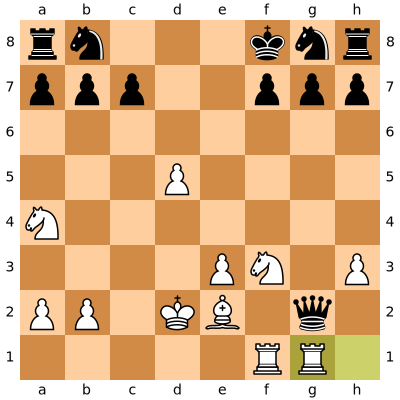

Current best:  Ne7
Current best:  Qg6


In [ ]:
# PLAY GAME
board = chess.Board()
matrix_board = initialize_board()
player = np.random.randint(2)
if player == 1:
    move = np.random.randint(1000)
    first = first_move(move)
    # matrix_board = perform_move(first, 0, matrix_board.copy())
    board.push_san(first)
    matrix_board = to_matrix_board(board)
move = ""
current_player = player
while move != "q":
    display(board)
    all_moves = str(board.legal_moves)
    all_moves_short = transform_to_move_list(board.legal_moves)
    if board.is_check():
        print("Check!")
    while move != "q" and move not in all_moves_short:
        print("You can select from moves:")
        print(all_moves[33 : len(all_moves) - 1])
        move = input("Your turn: please input legal move ")
        clear_output()
        display(board)
    if move == 'q':
        break
    # player_move = chess.Move.from_uci(move)
    board.push_san(move)
    try:
        matrix_board = to_matrix_board(board)
        # matrix_board = perform_move(move, player, matrix_board.copy())
    except Exception:
        print("Fatal error1")
        break
    clear_output()
    display(board)
    if board.is_game_over():
        break
    current_player = 1 - player
    #start_time = time.time()
    opponent_move = find_best_move(matrix_board.copy(), current_player, board, depth=3)
    try:    
        # print(opponent_move)
        board.push_san(opponent_move)
        matrix_board = to_matrix_board(board)
        # matrix_board = perform_move(opponent_move, 1 - player, matrix_board.copy())
    except Exception:
        print("Fatal error")
        break
    #print(time.time() - start_time)
    if board.is_game_over():
        display(board)
        break
    current_player = 1 - current_player
    #clear_output()

if board.is_checkmate():
    if current_player == 0:
        print("White wins!")
    else:
        print("Black wins!")
else:
    print("Draw!")

In [27]:
def pvs(chess_board, board, depth, alpha=-1000, beta=1000, color=0, bestmove=None):
    if depth == 0:
        return (bestmove, evaluate(board.copy(), chess_board.copy(), color))
    moves = transform_to_move_list(chess_board.legal_moves)
    counter = 0
    current_move = moves[0]
    all_info = []
    for m in moves:
        current_move = m
        try:
            chess_board.push_san(m)
            board1 = to_matrix_board(chess_board.copy())
            #if depth == 2:
            #    print(evaluate(board.copy(), chess_board.copy(), 1-color))
            if counter == 0:
                score = -(pvs(chess_board.copy(), board1.copy(), depth-1, -beta, -alpha, 1-color, m)[1])
            else:
                score = -(pvs(chess_board.copy(), board1.copy(), depth-1, -alpha-1, -alpha, -color, m)[1])
                #if alpha < score < beta:
                #    score = -(pvs(chess_board.copy(), board.copy(), depth-1, -beta, -score, -color, m)[1])
            alpha = max(alpha, score)
            all_info.append((m, score))
            chess_board.pop()
            #if alpha >= beta:
            #    break
            counter += 1
        except Exception:
            print("Error")
            continue
    #print(current_move, depth)
    #print(chess_board.legal_moves)
    chess_board.push_san(current_move)
    board2 = to_matrix_board(chess_board.copy()) # perform_move(current_move, color, board.copy())
    return (current_move, evaluate(board2.copy(), chess_board.copy(), color), all_info)

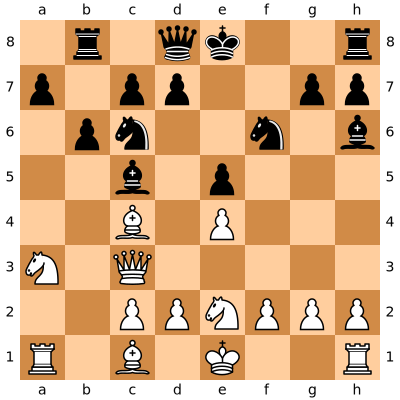

In [23]:
mitt_board = chess.Board("1r1qk2r/p1pp2pp/1pn2n1b/2b1p3/2B1P3/N1Q5/2PPNPPP/R1B1K2R b KQkq - 0 4")
mitt_board

In [20]:
def pvs(chess_board, board, depth, alpha=-1000, beta=1000, color=0, bestmove=None):
    if depth == 0:
        return (bestmove, evaluate(board.copy(), chess_board.copy(), color))
    moves = transform_to_move_list(chess_board.legal_moves)
    counter = 0
    current_move = moves[0]
    all_info = []
    if color == 0:
        v = -10**5
        for m in moves:
            current_move = m
            try:
                chess_board.push_san(m)
                board1 = to_matrix_board(chess_board.copy())
                #if depth == 2:
                #    print(evaluate(board.copy(), chess_board.copy(), 1-color))
                #if counter == 0:
                #    score = -(pvs(chess_board.copy(), board1.copy(), depth-1, -beta, -alpha, 1-color, m)[1])
                #else:
                score = max(v, pvs(chess_board.copy(), board1.copy(), depth-1, alpha, beta, 1-color, m)[1])
                    #if alpha < score < beta:
                    #    score = -(pvs(chess_board.copy(), board.copy(), depth-1, -beta, -score, -color, m)[1])
                alpha = max(alpha, score)
                all_info.append((m, score))
                chess_board.pop()
                if alpha >= beta:
                    break
                counter += 1
            except Exception:
                print("Error")
                continue
    else:            
        v = 10**5
        for m in moves:
            current_move = m
            try:
                chess_board.push_san(m)
                board1 = to_matrix_board(chess_board.copy())
                #if depth == 2:
                #    print(evaluate(board.copy(), chess_board.copy(), 1-color))
                #if counter == 0:
                #    score = -(pvs(chess_board.copy(), board1.copy(), depth-1, -beta, -alpha, 1-color, m)[1])
                #else:
                score = min(v, pvs(chess_board.copy(), board1.copy(), depth-1, alpha, beta, 1-color, m)[1])
                    #if alpha < score < beta:
                    #    score = -(pvs(chess_board.copy(), board.copy(), depth-1, -beta, -score, -color, m)[1])
                beta = min(beta, v)
                all_info.append((m, score))
                chess_board.pop()
                if alpha >= beta:
                    break
                counter += 1
            except Exception:
                print("Error")
                continue
    #print(current_move, depth)
    #print(chess_board.legal_moves)
    chess_board.push_san(current_move)
    board2 = to_matrix_board(chess_board.copy()) # perform_move(current_move, color, board.copy())
    return (current_move, v, all_info)

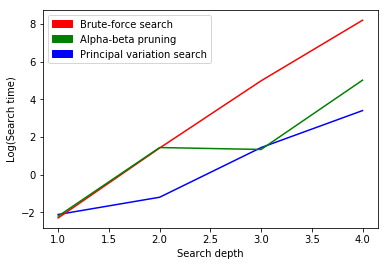

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
x = [1, 2, 3, 4]
x1 = [1, 2, 3]
y1 = [0.12, 0.3, 4.2, 30]
y2 = [0.1, 4.1, 146, 146*25]
y3 = [0.11, 4.21, 3.8, 151]
plt.plot(x, np.log(y1), color='blue')
plt.plot(x, np.log(y2), color='red')
plt.plot(x, np.log(y3), color='green')
red_patch = mpatches.Patch(color='red', label='Brute-force search')
green_patch = mpatches.Patch(color='green', label='Alpha-beta pruning')
blue_patch = mpatches.Patch(color='blue', label='Principal variation search')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.xlabel("Search depth")
plt.ylabel("Log(Search time)")
plt.show()
         

In [69]:
board = chess.Board()
board.push_san("e4")
board.push_san("a5")
matrix = to_matrix_board(board)
print(matrix)
print(evaluate(matrix, board, 0))

[[  5.   1.   0.   0.  11.   0.   0.  15.]
 [  2.   1.   0.   0.   0.   0.  11.  12.]
 [  4.   1.   0.   0.   0.   0.  11.  14.]
 [  8.   1.   0.   0.   0.   0.  11.  18.]
 [  9.   0.   0.   1.   0.   0.  11.  19.]
 [  4.   1.   0.   0.   0.   0.  11.  14.]
 [  2.   1.   0.   0.   0.   0.  11.  12.]
 [  5.   1.   0.   0.   0.   0.  11.  15.]]
0.11549295774647887
